In [3]:
from fastai.vision.all import *
from fastai.metrics import error_rate
import os
#import cv2
import numpy as np


In [4]:
bs = 32  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
sz = 224 #image size
PATH = r"C:\Users\GlenKings\Desktop\py\classes1"

In [5]:
#bs = 32  #batch size: if your GPU is running out of memory, set a smaller batch size, i.e 16
#sz = 224 #image size
#PATH = './classes/'

In [6]:
classes1 = []
for d in os.listdir(PATH):
    if os.path.isdir(os.path.join(PATH, d)) and not d.startswith('.'):
        classes1.append(d) 
print ("There are ", len(classes1), "classes:\n", classes1)

There are  2 classes:
 ['cree', 'lilimar']


In [7]:
fns = get_image_files(PATH)
fns

(#310) [Path('C:/Users/GlenKings/Desktop/py/classes1/cree/-cicchino-at-the-smurfs-the-lost-village-premiere-at-the-arclight-1264308364.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/0OKudRoG.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/1118full-cree-cicchino.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/119459540_155307302888742_5505950083391189743_n.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/345645-1601642411.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/34th-annual-imagen-awards-beverly-hills-usa-shutterstock-editorial-10359453e.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/34thAnnualImagenAwardsrsPmaGA9JgTx.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/3ee0547a465fa7f7ea27528b94c212be.jpg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/41-Hottest-Pictures-Of-Cree-Cicchino.jpeg'),Path('C:/Users/GlenKings/Desktop/py/classes1/cree/7665a23068c7210e69ae837bf3bef8fb.jpg')...]

In [8]:
#failed = verify_images(fns)
#failed

for fn in fns:
    passed = verify_image(fn)
    if not passed:
        os.unlink(fn)

In [9]:
class DataLoders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train, valid = add_props(lambda i, self: self[i])

In [10]:
classes1 = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct = 0.2, seed = 42),
    get_y = parent_label,
    item_tfms = Resize(128))

In [11]:
dls = classes1.dataloaders(PATH)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


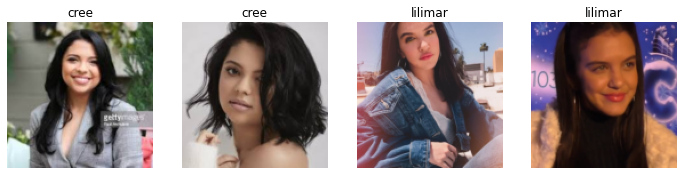

In [12]:
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


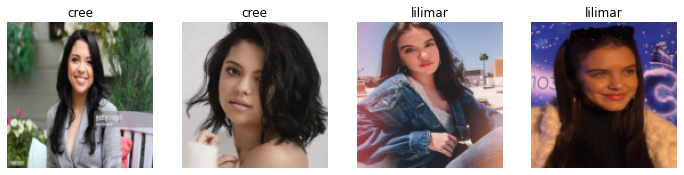

In [13]:
classes1 = classes1.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = classes1.dataloaders(PATH)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


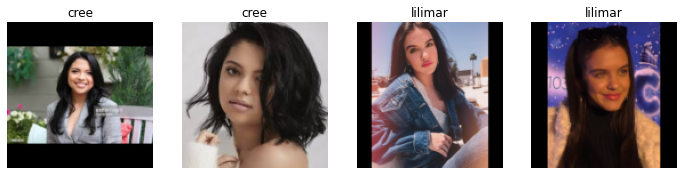

In [14]:
classes1 = classes1.new(item_tfms=Resize(128,ResizeMethod.Pad,
                                        pad_mode='zeros'))
dls = classes1.dataloaders(PATH)
dls.valid.show_batch(max_n=4, nrows=1)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


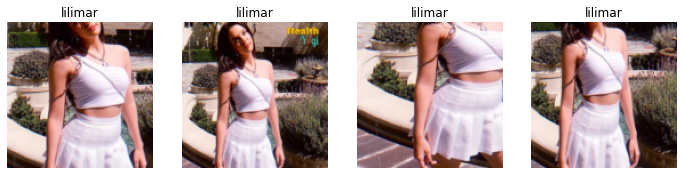

In [15]:
classes1 = classes1.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = classes1.dataloaders(PATH)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


c:\program files\python39\lib\site-packages\torch\_tensor.py:1023: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ..\aten\src\ATen\native\BatchLinearAlgebra.cpp:760.)
  ret = func(*args, **kwargs)


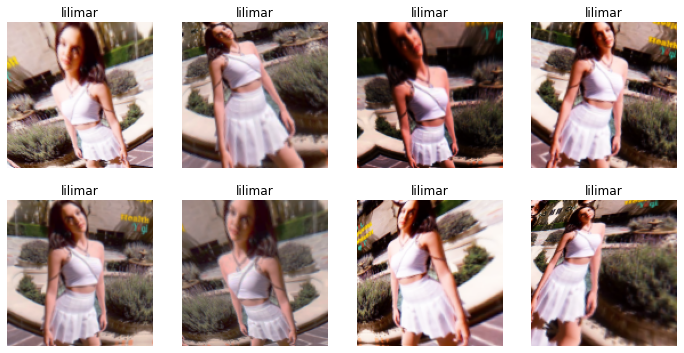

In [16]:
classes1 = classes1.new(item_tfms=Resize(128),
                       batch_tfms=aug_transforms(mult=2))
dls = classes1.dataloaders(PATH)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [17]:
classes1 = classes1.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = classes1.dataloaders(PATH)

Due to IPython and Windows limitation, python multiprocessing isn't available now.
So `number_workers` is changed to 0 to avoid getting stuck


In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

c:\program files\python39\lib\site-packages\torch\nn\functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  ..\c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


epoch,train_loss,valid_loss,error_rate,time
0,1.393446,0.867159,0.435484,01:03


epoch,train_loss,valid_loss,error_rate,time
0,1.015423,0.676364,0.403226,02:19
1,0.840470,0.522974,0.258065,03:47
2,0.740166,0.446807,0.177419,03:47
3,0.698505,0.417151,0.193548,03:48


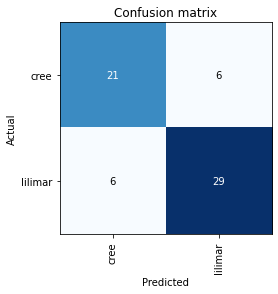

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

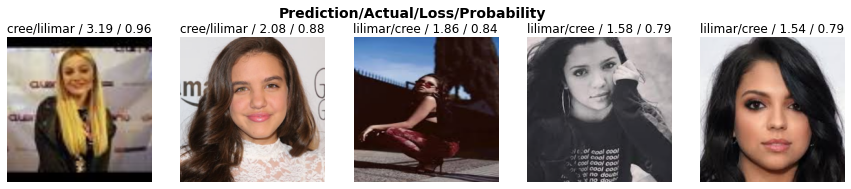

In [20]:
interp.plot_top_losses(5, nrows=1)

In [21]:
#!pip install utils
#from fastai.vision import *
#from fastai.vision.widgets import *

#from utils import *


In [1]:

from utils import *

In [29]:
#from multiprocessing.process import _exitcode_to_name
#cleaner = ImageClassifierCleaner(learn)
#cleaner
#print(_exitcode_to_name[BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.])


In [36]:
from fastai.vision.widgets import *
#import concurrent.futures

#if __name__ == "__main__":
    #with concurrent.futures.ProcessPoolExecutor() as executor:
       # p = executor.submit(wait.wait,1)
       # print(p.result())
        
#def parallel_trees(m, fn, n_jobs=8):
   # return list(ThreadPoolExecutor(n_jobs).map(fn, m.estimators_))
#n_cpus=1

cleaner = ImageClassifierCleaner(learn)
cleaner

BrokenProcessPool: A process in the process pool was terminated abruptly while the future was running or pending.

In [32]:
#if len(pickle.dumps((dClose_dt, d2Close_dt2, d3Close_dt3))) > 2 * 10 ** 9: 
       # raise RuntimeError('return data can not be sent!')

NameError: name 'dClose_dt' is not defined